# Imports

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# Loading the Data

In [ ]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
df['target'] = wine.target

# Task 1 - EDA (2 points)
Perform basic Exploratory Data Analysis (EDA)
- check dataset size, columns and their datatypes
- check unique values
- check missing values, and if they are - apply some imputation strategy
- check if there some catgorical features, and if they are - apply some category encoding strategy
- check the distributions for features (optional)
- check correlation for features (optional)

In [ ]:
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
print("Розмір датасету", df.shape)

Розмір датасету (178, 14)


In [ ]:
df.shape[0]

178

In [ ]:
df.shape[1]

14

In [ ]:
df.dtypes

,0
alcohol,float64
malic_acid,float64
ash,float64
alcalinity_of_ash,float64
magnesium,float64
total_phenols,float64
flavanoids,float64
nonflavanoid_phenols,float64
proanthocyanins,float64
color_intensity,float64


Як бачимо категорійних аних немає по типу даних, оскільки всі типи чисельні

In [ ]:
print("\nЧи є категоріальні змінні?")
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if not categorical_cols:
    print("Немає категорійних даних")
else:
    print("Треба робити енкодинг:", categorical_cols)


Чи є категоріальні змінні?
Немає категорійних даних


In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
print("\nКількість унікальних значень у кожній колонці:")
df.nunique()


Кількість унікальних значень у кожній колонці:


,0
alcohol,126
malic_acid,133
ash,79
alcalinity_of_ash,63
magnesium,53
total_phenols,97
flavanoids,132
nonflavanoid_phenols,39
proanthocyanins,101
color_intensity,132


In [ ]:
# Відсоток
(df.nunique() / len(df)) * 100

,0
alcohol,70.786517
malic_acid,74.719101
ash,44.382022
alcalinity_of_ash,35.393258
magnesium,29.775281
total_phenols,54.494382
flavanoids,74.157303
nonflavanoid_phenols,21.910112
proanthocyanins,56.741573
color_intensity,74.157303


In [ ]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
df.isnull()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

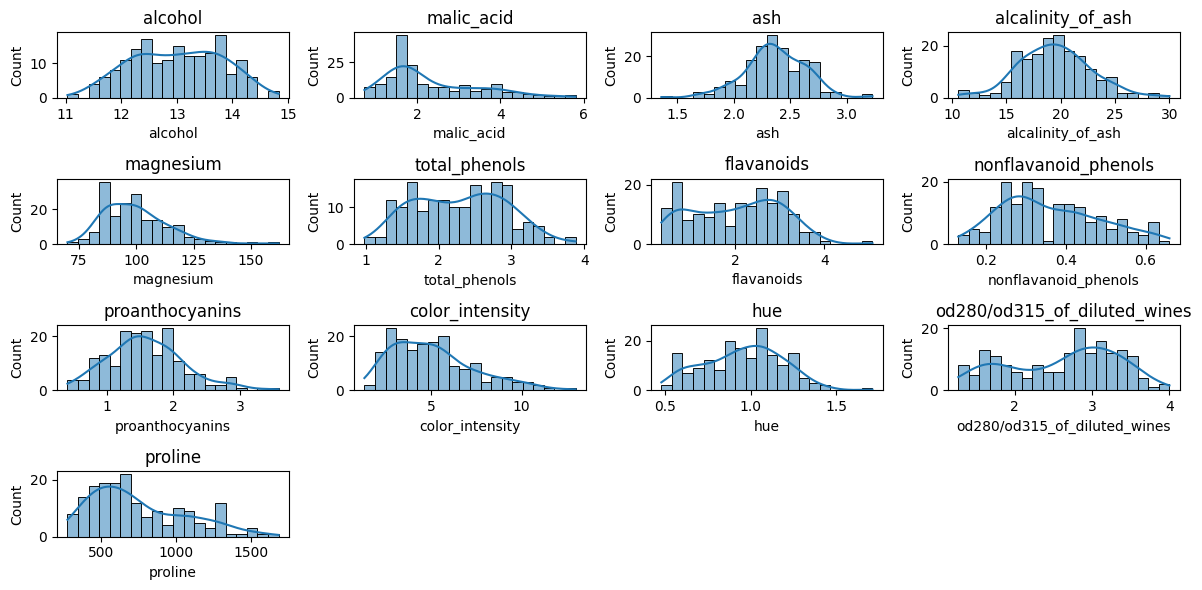

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:-1], 1):
  plt.subplot(4, 4, i)
  sns.histplot(df[col], kde=True, bins=20)
  plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


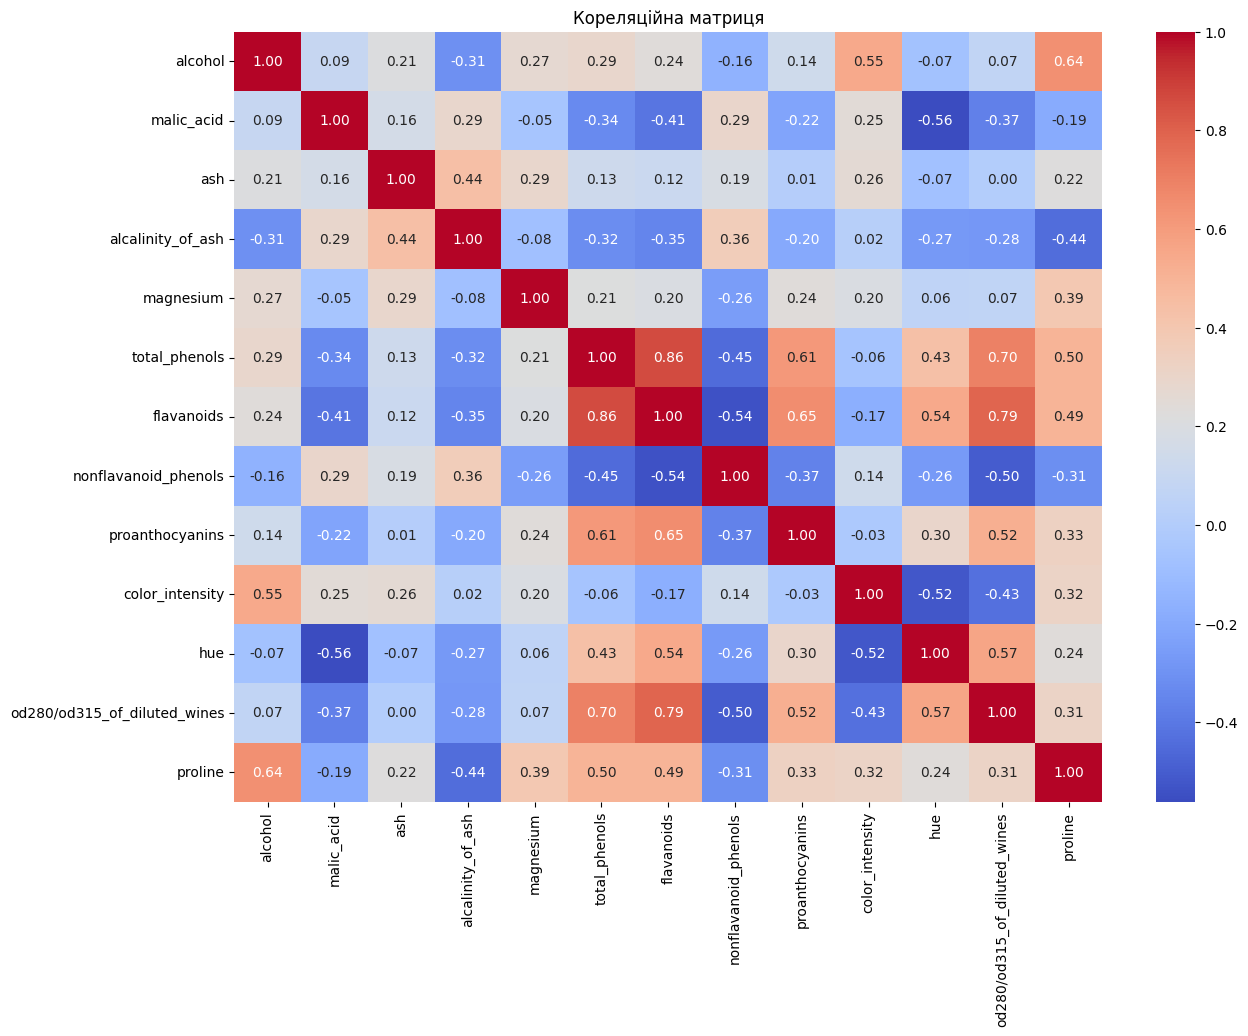

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns='target').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()

In [ ]:
df['target'].value_counts()

,count
target,
1,71
0,59
2,48


#Task 2 - Data Scaling (2 points)
Use sklearn StandardScaler to correctly standardise the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(columns='target')

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_scaled_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# Task 3 - Simple KMeans flow (2 points)
Implement simple sklearn KMeans clustering algorithm with default (or some arbitrary) number of clusters and check the distribution of clusters. Don't forget to use normalized data for it

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_copy = X_scaled_df.copy()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [ ]:
df_copy['cluster'] = kmeans.fit_predict(df_copy)

In [ ]:
cluster_distribution = df_copy['cluster'].value_counts()
print("Розподіл об'єктів по кластерах:")
print(cluster_distribution)

Розподіл об'єктів по кластерах:
cluster
0    65
2    62
1    51
Name: count, dtype: int64


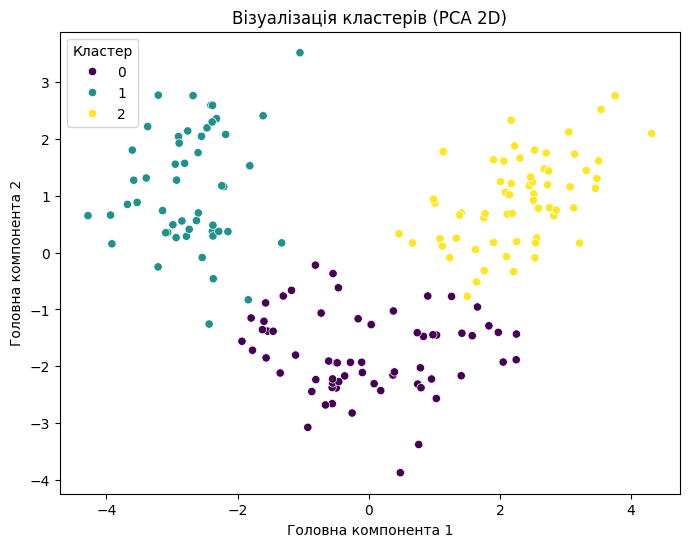

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_copy['cluster'], palette='viridis')
plt.title("Візуалізація кластерів (PCA 2D)")
plt.xlabel("Головна компонента 1")
plt.ylabel("Головна компонента 2")
plt.legend(title="Кластер")
plt.show()

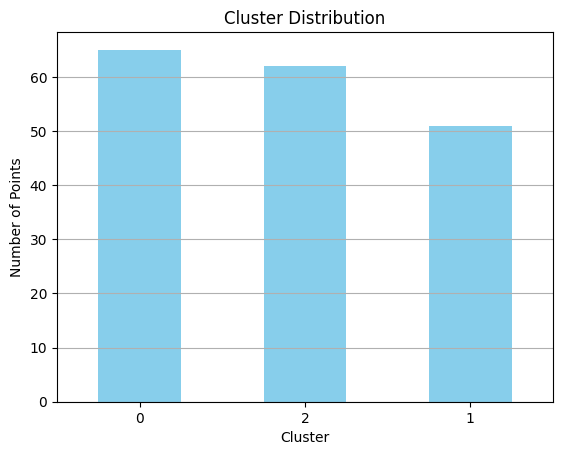

In [ ]:
cluster_distribution.plot(kind='bar', title='Cluster Distribution', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Task 4 - Evaluate Clustering Results (2 points)
- Check the inertia value
- Check the silhouette score
- Apply PCA to reduce dimentionality to 2D or 3D and visualize clustering results

In [ ]:
inertia = kmeans.inertia_

In [ ]:
print(f"Inertia is: {inertia}")

Inertia is: 1277.928488844643


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette = silhouette_score(df_copy, df_copy['cluster'])

In [ ]:
print(f"Silhouette score is : {silhouette}")

Silhouette score is : 0.32041621459358616


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled_df)

In [ ]:
labels = df_copy['cluster']

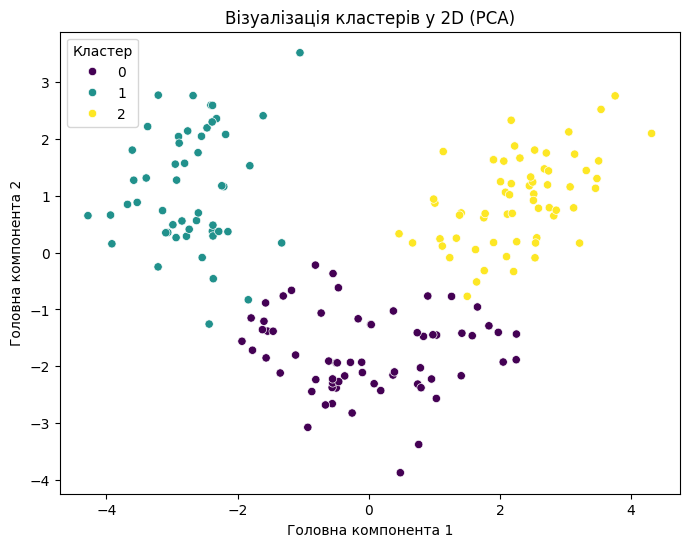

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=labels, palette='viridis')
plt.title('Візуалізація кластерів у 2D (PCA)')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.legend(title='Кластер')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled_df)

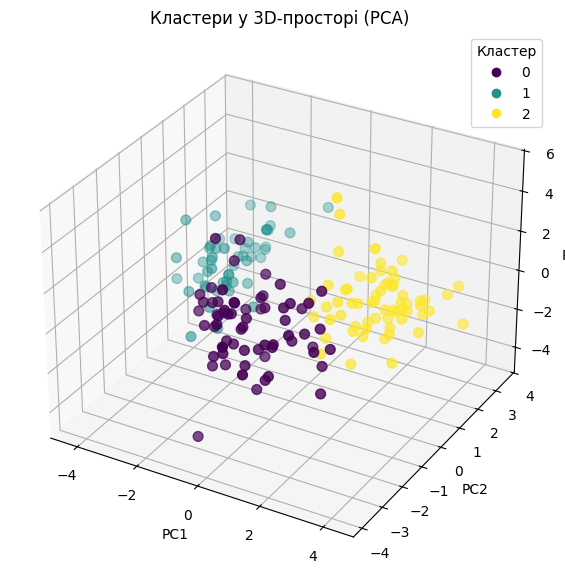

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=labels, cmap='viridis', s=50)

ax.set_title("Кластери у 3D-просторі (PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Кластер")
plt.show()

# Task 5 - Dimensionality Reduction with PCA (2 points)
- Apply PCA to normalized data
- Try different number of components and check the explained variance
- Select optimal value for number of components, fit the PCA and check the loadings for principal components

In [ ]:
pca_full = PCA()
pca_full.fit(X_scaled_df)

PCA()

In [ ]:
explained_var = pca_full.explained_variance_ratio_
cum_var = explained_var.cumsum()

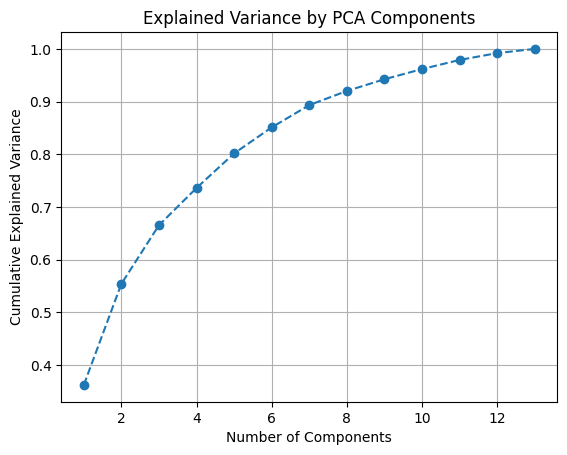

In [ ]:
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')547
plt.grid(True)
plt.show()

In [ ]:
optimal_n = next(i for i, total in enumerate(cum_var) if total >= 0.95) + 1
print(f"Оптимальна кількість компонент: {optimal_n}")

Оптимальна кількість компонент: 10


In [ ]:
pca_opt = PCA(n_components=optimal_n)
pca_opt.fit(X_scaled_df)

PCA(n_components=10)

In [ ]:
loadings = pd.DataFrame(pca_opt.components_.T, columns=[f'PC{i+1}' for i in range(optimal_n)], index=X_scaled_df.columns)
print(loadings)

                                   PC1       PC2       PC3       PC4  \
alcohol                       0.144329  0.483652 -0.207383 -0.017856   
malic_acid                   -0.245188  0.224931  0.089013  0.536890   
ash                          -0.002051  0.316069  0.626224 -0.214176   
alcalinity_of_ash            -0.239320 -0.010591  0.612080  0.060859   
magnesium                     0.141992  0.299634  0.130757 -0.351797   
total_phenols                 0.394661  0.065040  0.146179  0.198068   
flavanoids                    0.422934 -0.003360  0.150682  0.152295   
nonflavanoid_phenols         -0.298533  0.028779  0.170368 -0.203301   
proanthocyanins               0.313429  0.039302  0.149454  0.399057   
color_intensity              -0.088617  0.529996 -0.137306  0.065926   
hue                           0.296715 -0.279235  0.085222 -0.427771   
od280/od315_of_diluted_wines  0.376167 -0.164496  0.166005  0.184121   
proline                       0.286752  0.364903 -0.126746 -0.23

# Task 6 - Dimensionality Reduction + Clustering (2 points)
- Apply clustering to PCA-transformed data
- Check the same metrics as in previous task and visualize the results
- Select better approach (with PCA or without)

In [ ]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)

In [ ]:
X_pca_opt = pca_opt.transform(X_scaled_df)

In [ ]:
clusters_pca = kmeans_pca.fit_predict(X_pca_opt)

In [ ]:
print(f"Inertia на PCA-даних: {kmeans_pca.inertia_}")
from sklearn.metrics import silhouette_score
print(f"Silhouette на PCA-даних: {silhouette_score(X_pca_opt, clusters_pca)}")

Inertia на PCA-даних: 1189.6391379398024
Silhouette на PCA-даних: 0.2986748294369289


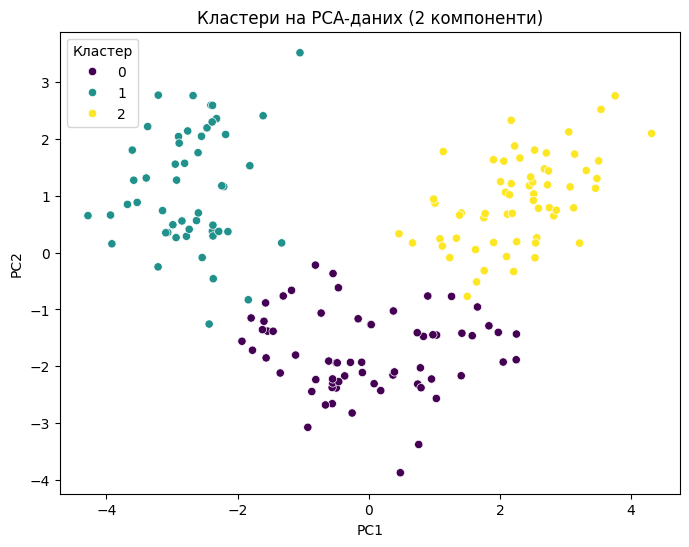

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_opt[:,0], y=X_pca_opt[:,1], hue=clusters_pca, palette='viridis')
plt.title('Кластери на PCA-даних (2 компоненти)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Кластер')
plt.show()

In [ ]:
inertia = kmeans_pca.inertia_
print(f"Inertia: {inertia}")

Inertia: 1189.6391379398024


# Task 7 - Elbow Rule (2 points)
- Use Elbow Rule to define the optimal number of clusters
- Train KMeans and check the same metrics and visualizations

In [ ]:
inertia_list = []
k_values = range(1, 11)

In [ ]:
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled_df)
    inertia_list.append(km.inertia_)

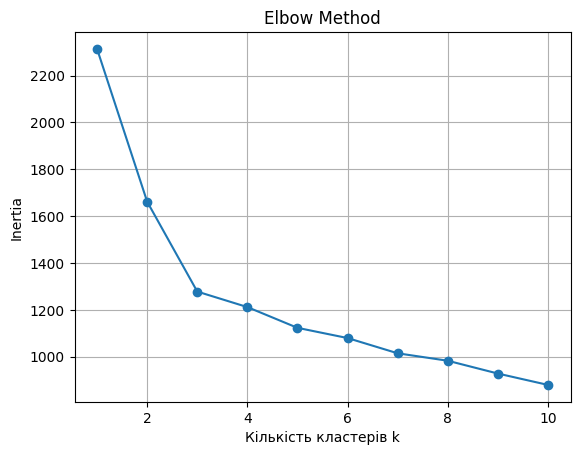

In [ ]:
plt.plot(k_values, inertia_list, marker='o')
plt.xlabel('Кількість кластерів k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [ ]:
k_opt = 3
kmeans_opt = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters_opt = kmeans_opt.fit_predict(X_scaled_df)

In [ ]:
print(f"Inertia при k={k_opt}: {kmeans_opt.inertia_}")
print(f"Silhouette при k={k_opt}: {silhouette_score(X_scaled_df, clusters_opt)}")

Inertia при k=3: 1277.928488844643
Silhouette при k=3: 0.2848589191898987


In [ ]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled_df)

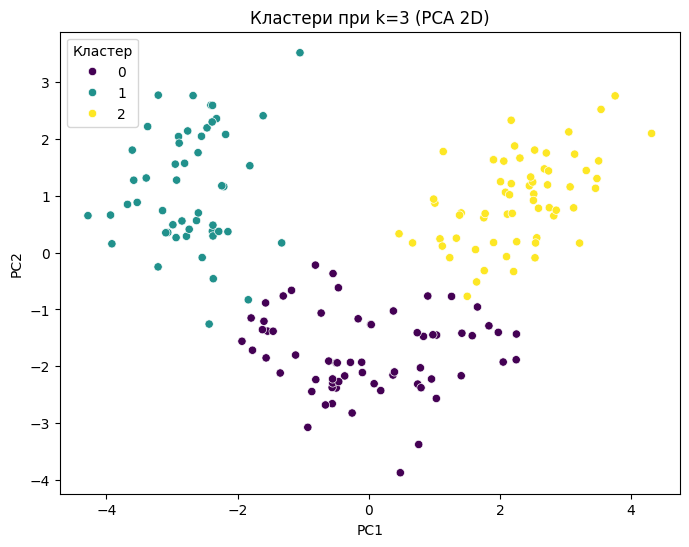

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], hue=clusters_opt, palette='viridis')
plt.title(f'Кластери при k={k_opt} (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Кластер')
plt.show()

# Task 8 - Using Pipeline (2 points)
- Use sklearn Pipeline to combine StandardScaler + PCA + KMeans with previously defined parameters
- Fit the pipeline to the data
- Make final visualization

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=optimal_n)),
    ('kmeans', KMeans(n_clusters=k_opt, random_state=42))
])

In [ ]:
pipeline.fit(df.drop(columns='target'))

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [ ]:
clusters_pipe = pipeline.named_steps['kmeans'].labels_

In [ ]:
X_pca_pipe = pipeline.named_steps['pca'].transform(
    pipeline.named_steps['scaler'].transform(df.drop(columns='target'))
)

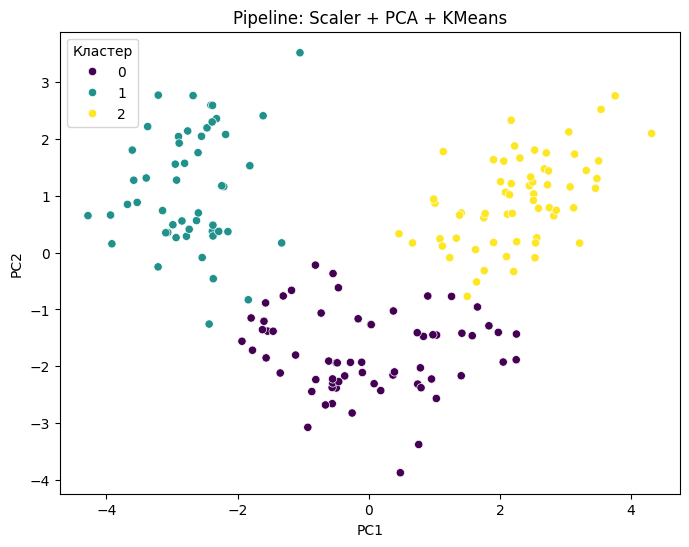

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_pipe[:,0], y=X_pca_pipe[:,1], hue=clusters_pipe, palette='viridis')
plt.title('Pipeline: Scaler + PCA + KMeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Кластер')
plt.show()

# Task 9 - DBSCAN (2 points)
Try to apply sklearn DBSCAN or any other algorithm and compare the results and select the best

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled_df)

In [ ]:
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

In [ ]:
print(f"Кількість кластерів (DBSCAN): {n_clusters_dbscan}")
print(f"Кількість шумових точок (DBSCAN): {n_noise}")

Кількість кластерів (DBSCAN): 0
Кількість шумових точок (DBSCAN): 178


In [ ]:
if n_clusters_dbscan > 1:
    print(f"Silhouette score (DBSCAN): {silhouette_score(X_scaled_df, dbscan_labels)}")
else:
    print("Silhouette score не можна обчислити (кластерів менше двох)")

Silhouette score не можна обчислити (кластерів менше двох)


In [ ]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled_df)

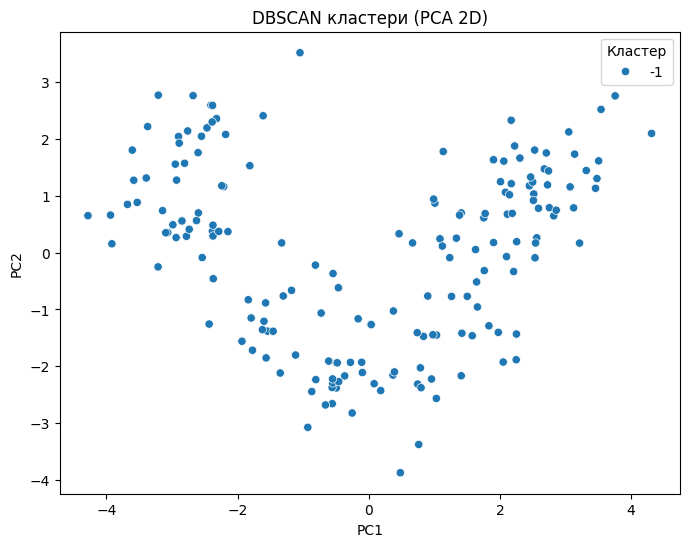

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], hue=dbscan_labels, palette='tab10')
plt.title('DBSCAN кластери (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Кластер')
plt.show()

# Task 10 - Analysis (2 points)
Perform all necessary analysis and write a few-paragraph description of clustering results

У ході роботи було виконано кластериацію винного датасету wine із використанням різних алгоритмів: Kmeans, Kmeans після PCA, а також DBSCAN. Перед усіма алгоритмами я стандартизував дані, що забезпечило однакову вагу всіх ознак із датасету.



Якщо говорити про кластери, то отримуємо наступну ситуацію:
  1. Кластер 0. Молоді, недорогі вина
    Низький вміст алкоголю
    Низький рівень флавоноїдів
    Низька інтенсивність кольору
    Висновок: це легкі, прості вина, які зазвичай вживаються молодими без тривалої витримки. Їхня структура проста, смак - м'який, а ціна - доступна. Вони можуть бути масово виробленими та орієнтованими на широке коло споживачів
  2. Кластер 1. Вина середнього класу, витримані вина
    Середній рівень алкоголю
    Середній вміст флавоноїдів
    Помірна інтенсивність кольору
    Висновок: ці вина мають збалансований профіль, характерний для вин ереднього ціноваого діапазону. Ймовірно це вина з помірною витримкою що мають певну складність смаку, але залишаються оступними для більшості покупців.
  3. Кластер 2. Вина високої якості
    Високий вміст флавоноїдів
    Низький вміст алкоголю
    Низька інтенсивність кольору
    Висновок: ці вина мають довгу витримку. Зниження інтенсивності кольору можу свідчити про їхнє дозрівання або про делікатний стиль виробництва. Це можуть бути дорогі вина, що розкривають свій потенціал з віком.